In [4]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import random


In [7]:
# Carregar os dados de crimes e a área de estudo
df_roubos = gpd.read_file("C:/Users/Vivian - H2R/Downloads/mba/git/mba_dados/shp_estudo/df_roubos_projetado.shp")
area_estudo = gpd.read_file("C:/Users/Vivian - H2R/Downloads/mba/git/mba_dados/shp_estudo/area_projetados.shp")


In [8]:
# Garantir que os dados estão no mesmo sistema de projeção
df_roubos = df_roubos.to_crs(epsg=31983)
area_estudo = area_estudo.to_crs(epsg=31983)

In [13]:
# Converter geometrias em coordenadas
crime_coords = np.column_stack((df_roubos.geometry.x, df_roubos.geometry.y))

In [14]:
# Calcular matriz de distâncias entre os pontos
dist_matrix = distance_matrix(crime_coords, crime_coords)

In [15]:
# Calcular a distância média ao vizinho mais próximo
min_dist = np.min(dist_matrix + np.identity(dist_matrix.shape[0]) * dist_matrix.max(), axis=1)
observed_mean_distance = np.mean(min_dist)

In [17]:
# Simulação por permutação para avaliação estatística
n_simulations = 1000
random_mean_distances = []

In [18]:
# Obter limites do polígono de estudo
minx, miny, maxx, maxy = area_estudo.total_bounds

In [19]:
for _ in range(n_simulations):
    # Criar pontos aleatórios
    rand_points = np.array([(random.uniform(minx, maxx), random.uniform(miny, maxy)) for _ in range(len(crime_coords))])
    
    # Calcular matriz de distâncias para pontos aleatórios
    rand_dist_matrix = distance_matrix(rand_points, rand_points)
    rand_min_dist = np.min(rand_dist_matrix + np.identity(rand_dist_matrix.shape[0]) * rand_dist_matrix.max(), axis=1)
    random_mean_distances.append(np.mean(rand_min_dist))


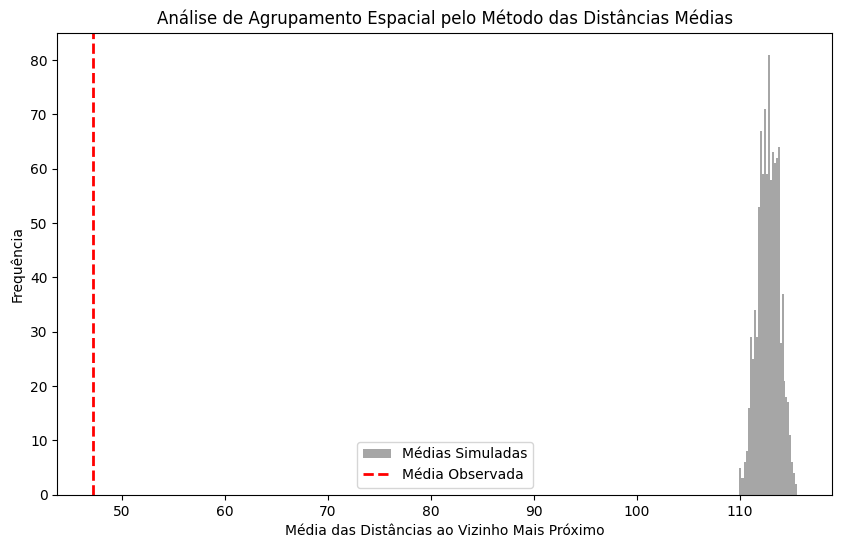

In [20]:
# Plotar resultados
plt.figure(figsize=(10, 6))
plt.hist(random_mean_distances, bins=30, alpha=0.7, color='gray', label='Médias Simuladas')
plt.axvline(observed_mean_distance, color='red', linewidth=2, linestyle='--', label='Média Observada')
plt.xlabel('Média das Distâncias ao Vizinho Mais Próximo')
plt.ylabel('Frequência')
plt.title('Análise de Agrupamento Espacial pelo Método das Distâncias Médias')
plt.legend()
plt.show()

In [21]:
# Relatório
p_value = np.sum(np.array(random_mean_distances) <= observed_mean_distance) / n_simulations
print(f"Média Observada das Distâncias: {observed_mean_distance}")
print(f"p-Valor: {p_value}")

if p_value < 0.05:
    print("Rejeitamos a hipótese nula de aleatoriedade espacial (padrão de agrupamento existe).")
else:
    print("Não rejeitamos a hipótese nula de aleatoriedade espacial (padrão possivelmente aleatório).")

Média Observada das Distâncias: 47.147584249667
p-Valor: 0.0
Rejeitamos a hipótese nula de aleatoriedade espacial (padrão de agrupamento existe).
